In [1]:
import numpy
import pandas
import sys
sys.path
sys.path.append('../get_data/')
sys.path.append('../')
import download_sdss_spectra as dss
import load_sdss_spectra as lss
import matplotlib.pyplot as plt
from matplotlib_params import set_plt_params
plt = set_plt_params(plt)

In [2]:
# The csv file with the identifiers was obtained from SDSS casjobs:

#https://skyserver.sdss.org/CasJobs

#with 

#SELECT  s.specObjID, s.plate,s.mjd,s.fiberid, s.run2d, s.z, s.class, p.extinction_g, s.snMedian, s.ra, s.dec into mydb.all_galaxies_and_quasars from ..SpecObj as s 
#LEFT JOIN PhotoObjAll p on s.bestObjID = p. objID 
#WHERE (    ((s.class = 'QSO') OR (s.class = 'GALAXY'))   AND (s.snMedian > 5))

In [4]:
all_galaxies_identifiers = pandas.read_csv('../get_data/all_high_snr_galaxies_and_quasars.csv')
all_galaxies_identifiers.head()

,specObjID,plate,mjd,fiberid,run2d,z,class,extinction_g,snMedian,ra,dec
0,403152186621585408,358,51818,291,26,0.179752,GALAXY,NaN,11.27980,261.429360,55.959943
1,403184072458790912,358,51818,407,26,0.079061,GALAXY,NaN,20.42518,262.248480,57.515854
2,440234040298072064,391,51782,26,26,0.107172,GALAXY,NaN,10.12399,8.211277,-0.405740
3,425673213918341120,378,52146,302,26,0.055970,GALAXY,NaN,21.79805,340.191580,-0.383813
4,425759525581121536,378,52146,616,26,0.144940,GALAXY,NaN,10.41913,342.062680,0.936796


In [5]:
# This is what we need in order to download the spectra itself:
dl_spectra_df = all_galaxies_identifiers[['plate','mjd','fiberid']]
dl_spectra_df.head()

,plate,mjd,fiberid
0,358,51818,291
1,358,51818,407
2,391,51782,26
3,378,52146,302
4,378,52146,616


In [6]:
# Try it with first 100
dss.download_spectra(dl_spectra_df.iloc[:100])

../get_data/download_sdss_spectra.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['run2d'] = run2d


Valid file exists ../data/dr15/sdss/spectro/redux/26/spectra/lite/0358/spec-0358-51818-0291.fits
Valid file exists ../data/dr15/sdss/spectro/redux/26/spectra/lite/0358/spec-0358-51818-0407.fits
Valid file exists ../data/dr15/sdss/spectro/redux/26/spectra/lite/0391/spec-0391-51782-0026.fits
Valid file exists ../data/dr15/sdss/spectro/redux/26/spectra/lite/0378/spec-0378-52146-0302.fits
Valid file exists ../data/dr15/sdss/spectro/redux/26/spectra/lite/0378/spec-0378-52146-0616.fits
Valid file exists ../data/dr15/sdss/spectro/redux/26/spectra/lite/0378/spec-0378-52146-0635.fits
Valid file exists ../data/dr15/sdss/spectro/redux/26/spectra/lite/0413/spec-0413-51821-0205.fits
Valid file exists ../data/dr15/sdss/spectro/redux/26/spectra/lite/0496/spec-0496-51988-0389.fits
Valid file exists ../data/dr15/sdss/spectro/redux/26/spectra/lite/0496/spec-0496-51988-0475.fits
Valid file exists ../data/dr15/sdss/spectro/redux/26/spectra/lite/0496/spec-0496-51988-0486.fits
Valid file exists ../data/dr15

In [8]:
# build a wavelength grid to interpolate the spectra to
s = 3800
e = 7400
wave = numpy.exp(numpy.linspace(numpy.log(s), numpy.log(e), 4200))

# load the spectra (first 100)
specs = lss.load_spectra(dl_spectra_df.iloc[:100], wave)
specs.shape

../get_data/download_sdss_spectra.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['run2d'] = run2d
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1863s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0656s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  63 out of 100 | elaps

(100, 4200)

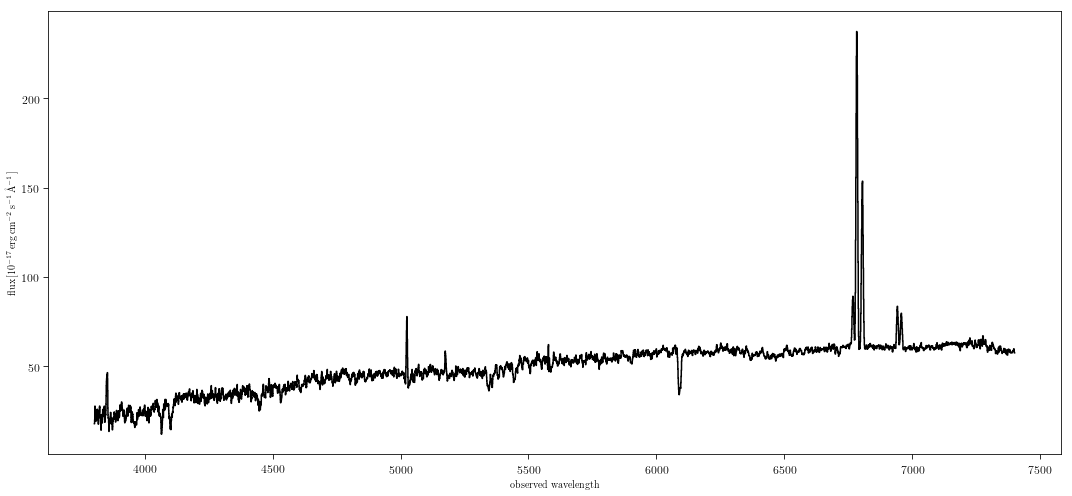

In [13]:
plt.figure(figsize = (15,7))
idx = numpy.random.choice(specs.shape[0])
plt.rcParams['figure.figsize'] = 10, 4
plt.step(wave, specs[idx], "k")
plt.xlabel("observed wavelength")
plt.ylabel("$\\mathrm{flux\\,[10^{-17}\\, erg \\, cm^{-2} \\, s^{-1} \\, \\AA^{-1}] }$")
plt.tight_layout()